<a href="https://colab.research.google.com/github/hyfoo-bot/project/blob/main/data/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
# Step 1: Import required libraries
from google.colab import files
import pandas as pd
#import io

# Step 2: Upload the file
#uploaded = files.upload()

# Step 3: Load the dataset
# Access the uploaded file data and decode it using 'latin-1' encoding.
# 'latin-1' encoding handles a broader range of characters and is less likely to fail.
df = pd.read_csv('/content/Global_Superstore (1).csv', encoding='latin-1')
df = df.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product Name'])
# Step 4: Verify the dataset
df.head(3)  # Check the first 3 rows

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,31-07-2012,31-07-2012,Same Day,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,2309.650,7.0,0.0,762.1845,933.57,Critical
1,5/2/2013,7/2/2013,Second Class,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,3709.395,9.0,0.1,-288.7650,923.63,Critical
2,17-10-2013,18-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,5175.171,9.0,0.1,919.9710,915.49,Medium


In [135]:
# Drop irrelevant columns
#df = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product Name'], axis=1)

# Handle categorical variables with one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Check the dataset after encoding
df.head(3)

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Order Date_1/1/2014,Order Date_1/10/2011,Order Date_1/10/2012,Order Date_1/10/2013,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,10024.0,2309.650,7.0,0.0,762.1845,933.57,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,NaN,3709.395,9.0,0.1,-288.7650,923.63,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,NaN,5175.171,9.0,0.1,919.9710,915.49,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [136]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Postal Code              3663
Sales                       1
Quantity                    1
Discount                    1
Profit                      1
                         ... 
Sub-Category_Supplies       0
Sub-Category_Tables         0
Order Priority_High         0
Order Priority_Low          0
Order Priority_Medium       0
Length: 7201, dtype: int64


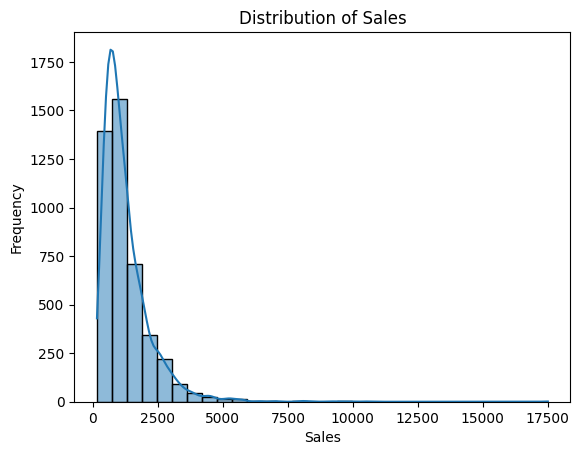

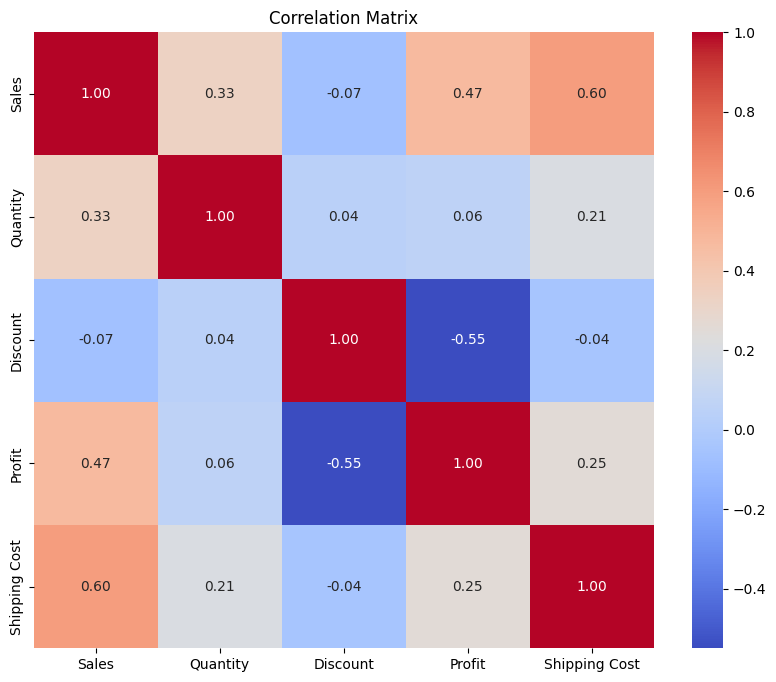

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Global sales distribution
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Correlation matrix for numerical columns
corr = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].corr()  # Include relevant numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [150]:
import numpy as np
# we convert to numpy arrays for data splitting and model training
Y = np.array(df['Sales']) # this extracts the resale_price column
X = np.array(df.drop(columns='Sales')) # remove resale_price from the feature set
feature_names = list(df.columns) # names of the features
print(X,Y,feature_names) # display a few rows of all arrays for reference


[[10024.0 7.0 0.0 ... False False False]
 [nan 9.0 0.1 ... False False False]
 [nan 9.0 0.1 ... False False True]
 ...
 [nan 8.0 0.0 ... False True False]
 [nan 4.0 0.0 ... True False False]
 [nan nan nan ... False False False]] [2309.65  3709.395 5175.171 ...  653.52   513.72       nan] ['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Date_1/1/2014', 'Order Date_1/10/2011', 'Order Date_1/10/2012', 'Order Date_1/10/2013', 'Order Date_1/10/2014', 'Order Date_1/11/2011', 'Order Date_1/11/2012', 'Order Date_1/11/2013', 'Order Date_1/11/2014', 'Order Date_1/12/2011', 'Order Date_1/12/2012', 'Order Date_1/12/2014', 'Order Date_1/2/2013', 'Order Date_1/3/2011', 'Order Date_1/3/2012', 'Order Date_1/3/2013', 'Order Date_1/4/2011', 'Order Date_1/4/2013', 'Order Date_1/4/2014', 'Order Date_1/5/2013', 'Order Date_1/5/2014', 'Order Date_1/6/2011', 'Order Date_1/6/2012', 'Order Date_1/6/2013', 'Order Date_1/6/2014', 'Order Date_1/7/2011', 'Order Date_1/7/2013', 'Or

In [157]:
from sklearn.model_selection import train_test_split

# Define predictors (X) and target variable (y)
X = df.drop('Sales', axis=1)  # Use all other columns as features
y = df['Sales']  # Target variable

# Split ratios
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

# Step 1: First split - Training and Temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)

# Step 2: Manually split the temporary set into validation and test (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Check the sizes
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (2658, 7200)
Validation set size: (886, 7200)
Test set size: (887, 7200)


In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Splitting data into features (X) and target variable (y)
X = df.drop(columns=['Sales', 'Profit'])
y = df['Sales']

# Creating a preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())]), X.select_dtypes(include=['object']).columns)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fitting the model to the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Postal Code', 'Quantity', 'Discount', 'Shipping Cost'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [159]:
# Check for any invalid date entries in 'Order Date' and 'Ship Date'
print(df.columns)  # Print all column names to check for the correct name

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Date_1/1/2014', 'Order Date_1/10/2011',
       'Order Date_1/10/2012', 'Order Date_1/10/2013',
       ...
       'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables', 'Order Priority_High', 'Order Priority_Low',
       'Order Priority_Medium'],
      dtype='object', length=7201)


In [160]:
import pandas as pd

# Step 1: Load the dataset, ensuring the first row is treated as the header
df = pd.read_csv('/content/Global_Superstore (1).csv', header=0,encoding='latin-1')

# Step 2: Print the column names to inspect them
print("Original Columns:")
print(df.columns)

# Step 3: Clean up column names by removing unwanted parts (e.g., dates)
df.columns = df.columns.str.extract(r'([A-Za-z\s]+)')[0]  # Keep only the text part (like 'Order Date')

# Step 4: Print the cleaned-up column names
print("Cleaned Columns:")
print(df.columns)

# Step 5: Check the first few rows of the 'Order Date' column to verify the format
print(df['Order Date'].head())  # Check 'Order Date' column

Original Columns:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')
Cleaned Columns:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category', 'Sub',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object', name=0)
0    31-07-2012
1      5/2/2013
2    17-10-2013
3    28-01-2013
4     5/11/2013
Name: Order Date, dtype: object


In [161]:
# Check for any invalid date entries in 'Order Date' and 'Ship Date'
print(df['Order Date'].head())  # Preview the first few rows of 'Order Date'
print(df['Ship Date'].head())   # Preview the first few rows of 'Ship Date'


0    31-07-2012
1      5/2/2013
2    17-10-2013
3    28-01-2013
4     5/11/2013
Name: Order Date, dtype: object
0    31-07-2012
1      7/2/2013
2    18-10-2013
3    30-01-2013
4     6/11/2013
Name: Ship Date, dtype: object


In [162]:
# Convert 'Order Date' and 'Ship Date' to datetime with dayfirst=True, handling errors gracefully
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

# Check for any 'NaT' values that could not be converted
print(df['Order Date'].isna().sum())  # Count of missing values (NaT) in 'Order Date'
print(df['Ship Date'].isna().sum())   # Count of missing values (NaT) in 'Ship Date'


1702
1716


In [163]:
# Drop rows with missing dates (NaT) or fill them with a placeholder (e.g., 'Unknown')
df = df.dropna(subset=['Order Date', 'Ship Date'])

# Alternatively, if you prefer to fill missing dates with a placeholder value (e.g., current date)
# df_cleaned['Order Date'].fillna(pd.to_datetime('2024-01-01'), inplace=True)
# df_cleaned['Ship Date'].fillna(pd.to_datetime('2024-01-01'), inplace=True)

# Re-check the missing values
print(df['Order Date'].isna().sum())  # Ensure there are no missing values now
print(df['Ship Date'].isna().sum())   # Ensure there are no missing values now


0
0


In [164]:
# Feature extraction from 'Order Date' and 'Ship Date'
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day
df['Ship_Year'] = df['Ship Date'].dt.year
df['Ship_Month'] = df['Ship Date'].dt.month

# Drop the original date columns
df = df.drop(columns=['Order Date', 'Ship Date'])

# Display the cleaned DataFrame
print(df.head())


0  Row ID         Order ID       Ship Mode Customer ID     Customer Name  \
0   32298   CA-2012-124891        Same Day    RH-19495       Rick Hansen   
2   25330    IN-2013-71249     First Class    CR-12730      Craig Reiter   
3   13524  ES-2013-1579342     First Class    KM-16375  Katherine Murray   
7   31192    IN-2012-86369  Standard Class    MB-18085        Mick Brown   
8   40155   CA-2014-135909  Standard Class    JW-15220         Jane Waco   

0      Segment           City       State        Country  Postal Code  ...  \
0     Consumer  New York City    New York  United States      10024.0  ...   
2     Consumer       Brisbane  Queensland      Australia          NaN  ...   
3  Home Office         Berlin      Berlin        Germany          NaN  ...   
7     Consumer       Hamilton     Waikato    New Zealand          NaN  ...   
8    Corporate     Sacramento  California  United States      95823.0  ...   

0 Quantity Discount     Profit Shipping Cost Order Priority Order_Year  \


In [165]:
# Check for missing values or incorrect data formats
print(df.isnull().sum())

0
Row ID               0
Order ID             0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Country              0
Postal Code       1852
Market               0
Region               0
Product ID           0
Category             0
Sub                  0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
Order Priority       0
Order_Year           0
Order_Month          0
Order_Day            0
Ship_Year            0
Ship_Month           0
dtype: int64


In [166]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'model__max_depth': [10, 20, None]      # Max depth of each tree
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
                           cv=3)  # 3-fold cross-validation

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Update the model with the best estimator
best_model = grid_search.best_estimator_


Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 200}


Test Set Performance:
Mean Absolute Error (MAE): 510.13
Mean Squared Error (MSE): 651565.57
R² Score: 0.40

Validation Set Performance:
Mean Absolute Error (MAE): 409.94
Mean Squared Error (MSE): 314729.19
R² Score: 0.59


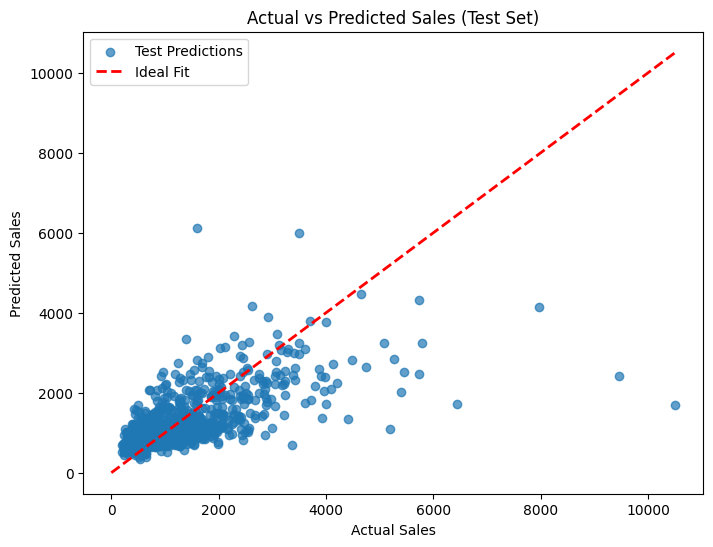

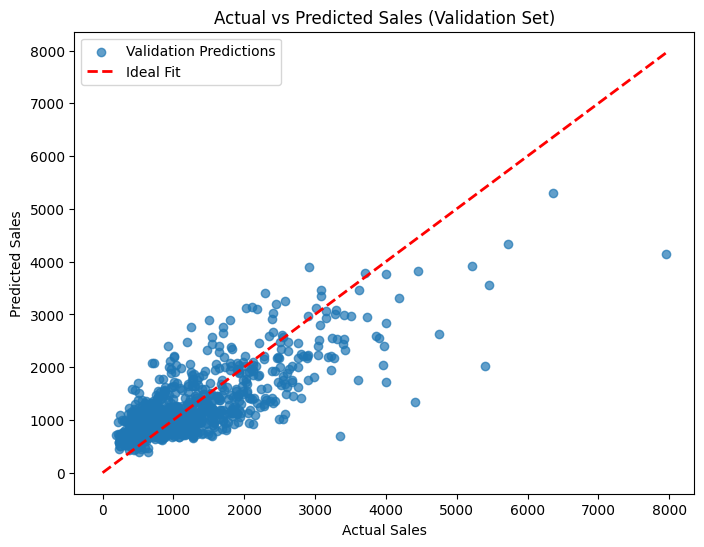

In [167]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the best model
y_pred_test = best_model.predict(X_test)
y_pred_val = best_model.predict(X_val)  # Predictions for the validation set

# Handle NaN values in Y_test and Y_val (Replace with appropriate strategy if needed)
y_test = y_test.fillna(y_test.mean())  # Replace NaNs with mean
y_val = y_val.fillna(y_val.mean())     # Replace NaNs with mean

# Compute the evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Compute the evaluation metrics for validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

# Display the metrics
print(f"Test Set Performance:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")

print(f"\nValidation Set Performance:")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"R² Score: {r2_val:.2f}")

# Visualize Actual vs Predicted Sales for Test Set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label="Test Predictions")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', linewidth=2, label="Ideal Fit")
plt.title("Actual vs Predicted Sales (Test Set)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()

# Visualize Actual vs Predicted Sales for Validation Set
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val, alpha=0.7, label="Validation Predictions")
plt.plot([0, max(y_val)], [0, max(y_val)], color='red', linestyle='--', linewidth=2, label="Ideal Fit")
plt.title("Actual vs Predicted Sales (Validation Set)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()